# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [13]:
N = 23
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Exercise_Hours'

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kurtosis, skew, probplot, chi2

In [54]:
df = pd.read_csv('datasets/teen_phone_addiction_dataset.csv')
df

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Jesus Yates,16,Female,New Jennifer,12th,3.9,6.4,53,4,...,0.3,80,15,2.7,1.8,1.0,Other,8,9.4,9.8
2996,2997,Bethany Murray,13,Female,Richardport,8th,3.6,7.3,93,5,...,0.9,45,8,3.1,0.0,0.3,Gaming,9,5.2,5.5
2997,2998,Norman Hughes,14,Other,Rebeccaton,7th,3.2,6.5,98,1,...,0.2,51,13,2.4,0.2,2.4,Social Media,9,5.9,6.2
2998,2999,Barbara Hinton,17,Female,Ramirezmouth,9th,6.7,7.5,67,3,...,1.6,125,17,1.7,2.6,1.5,Browsing,4,6.1,10.0


In [16]:
col = cols[N % 7]
data = df[col]
data

0       0.1
1       0.0
2       0.8
3       1.6
4       1.1
       ... 
2995    0.9
2996    0.0
2997    0.0
2998    0.2
2999    2.1
Name: Exercise_Hours, Length: 3000, dtype: float64

In [42]:
def main_stat(data):
    mean = data.mean()
    var = data.var()
    moda = data.mode().values[0]
    med = data.median()
    quantiles = data.quantile([0.25, 0.5, 0.75])
    kurt =kurtosis(data)
    skew_val = skew(data)
    iqr = quantiles[0.75] - quantiles[0.25]
    print(f"Среднее:{mean}\nДисперсия:{var}\nМода:{moda}\nМедиана:{med}\nКвантили:\n{quantiles}\nЭксцесс:{kurt}\nАссиметрия:{skew_val}\nИнтерквартильный размах:{iqr}")



In [18]:
def hist(data):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=20, edgecolor='black')
    plt.title('Гистограмма')
    plt.xlabel(col)
    plt.ylabel('Частота')

Эмпирическая функция распредления

In [19]:
def emp_raspr(data):
    plt.subplot(1, 2, 2)
    sorted_data = np.sort(data)
    y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, y, marker='.', linestyle='none')
    plt.title('Эмпирическая функция распределения')
    plt.xlabel(col)
    plt.ylabel('F(x)')
    
    plt.tight_layout()
    plt.show()

 Хи-квадрат

In [28]:
def chi_square_test(data, bins=10):
    observed, edges = np.histogram(data, bins=bins)
    expected = np.full_like(observed, len(data) / bins)
    chi_stat = np.sum((observed - expected) ** 2 / expected)
    p_value = 1 - chi2.cdf(chi_stat, bins - 1)
    print(f"Хи-квадрат статистика: {chi_stat:.2f}, p-value: {p_value:.4f}")


Ассиметрии и эксцесса

In [35]:
def stat2(data):
    skew_val = skew(data)
    kurt =kurtosis(data)

    n = len(data)
    z_skew = skew_val / np.sqrt(6 / n)
    z_kurt = kurt / np.sqrt(24 / n)
    print(f"Z-статистика для асимметрии: {z_skew:.2f}")
    print(f"Z-статистика для эксцесса: {z_kurt:.2f}")

qq плот

In [36]:
def qq_plot(data):
    plt.figure(figsize=(6, 6))
    probplot(data, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    plt.show()

In [37]:
def task1_2(data):
    main_stat(data)
    hist(data)
    emp_raspr(data)
    chi_square_test(data)
    stat2(data)
    qq_plot(data)
    

Среднее:1.0406666666666666
Дисперсия:0.5396661109258641
Мода:0.0
Медиана:1.0
Квантили:
0.25    0.5
0.50    1.0
0.75    1.5
Name: Exercise_Hours, dtype: float64
Эксцесс:-0.2590583883822495
Ассиметрия:0.43841915278918886
Интерквартильный размах:1.0


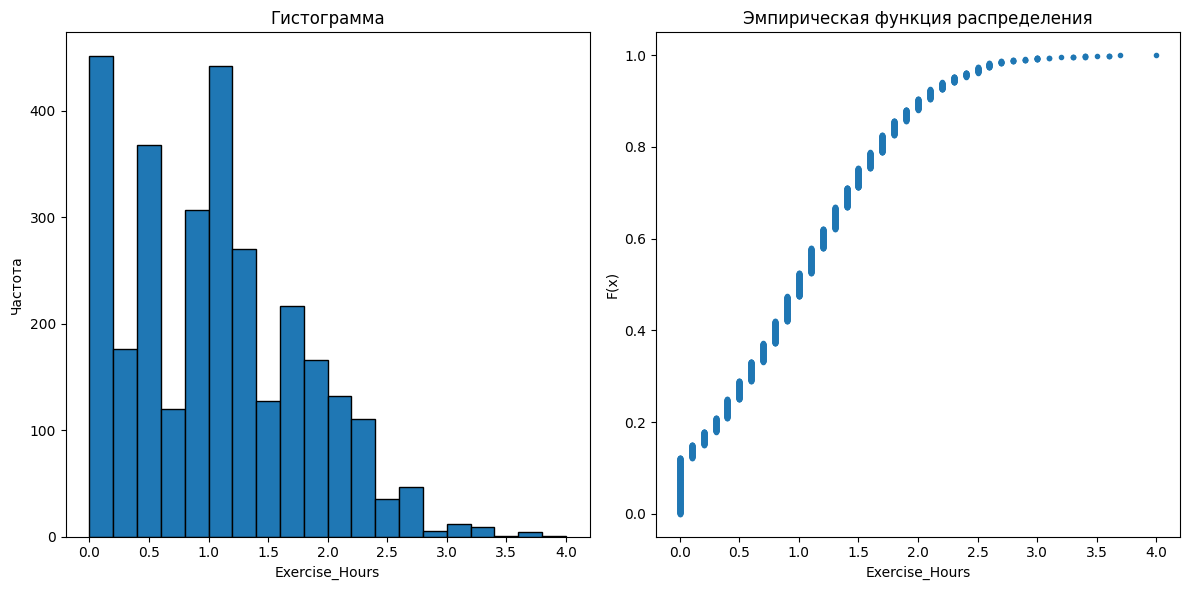

Хи-квадрат статистика: 2207.58, p-value: 0.0000
Z-статистика для асимметрии: 9.80
Z-статистика для эксцесса: -2.90


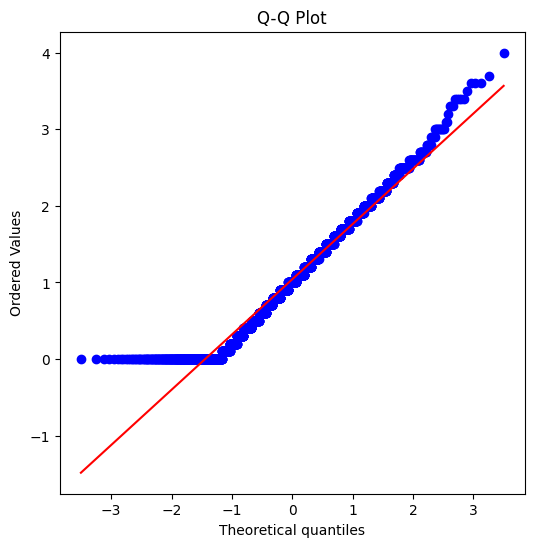

In [43]:
task1_2(data)

Удаление выбросов

In [45]:
quantiles = data.quantile([0.25, 0.5, 0.75])
iqr = quantiles[0.75] - quantiles[0.25]
q1 = quantiles[0.25]
q3 = quantiles[0.75]
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data_cleaned = data[(data >= lower_bound) & (data <= upper_bound)]

Среднее:1.0270533020449213
Дисперсия:0.509754124253848
Мода:0.0
Медиана:1.0
Квантили:
0.25    0.4
0.50    1.0
0.75    1.5
Name: Exercise_Hours, dtype: float64
Эксцесс:-0.6407160135601595
Ассиметрия:0.31846365246332575
Интерквартильный размах:1.1


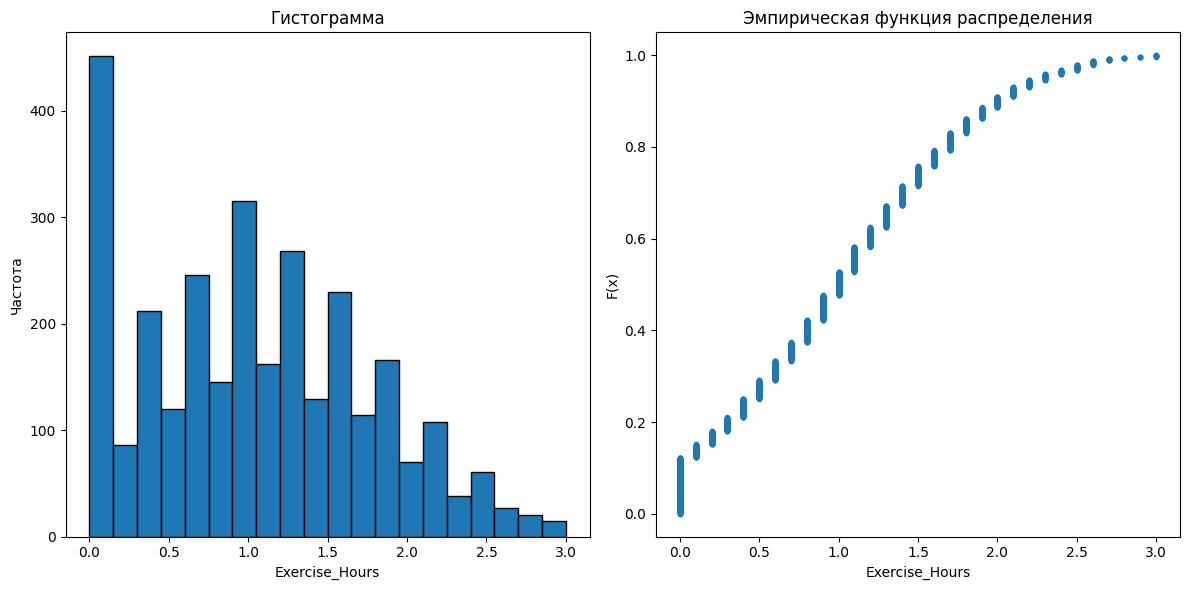

Хи-квадрат статистика: 842.62, p-value: 0.0000
Z-статистика для асимметрии: 7.10
Z-статистика для эксцесса: -7.14


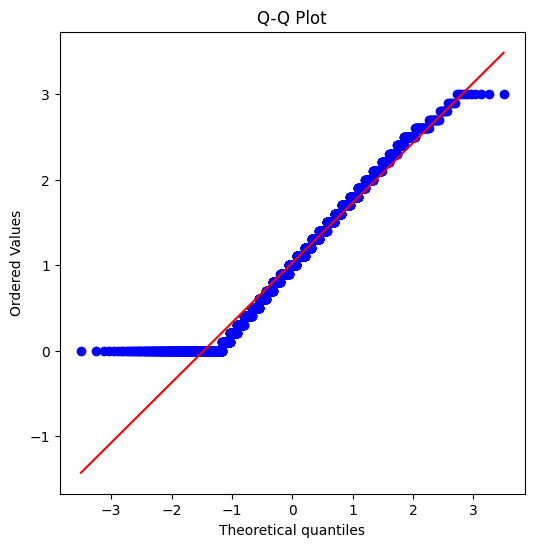

In [46]:
task1_2(data_cleaned)

Логарифмирование

In [50]:
data_log = np.log1p(data)


Среднее:0.64531018899469
Дисперсия:0.14158558015771827
Мода:0.0
Медиана:0.6931471805599453
Квантили:
0.25    0.405465
0.50    0.693147
0.75    0.916291
Name: Exercise_Hours, dtype: float64
Эксцесс:-0.8474425437423276
Ассиметрия:-0.24895588238500774
Интерквартильный размах:0.5108256237659907


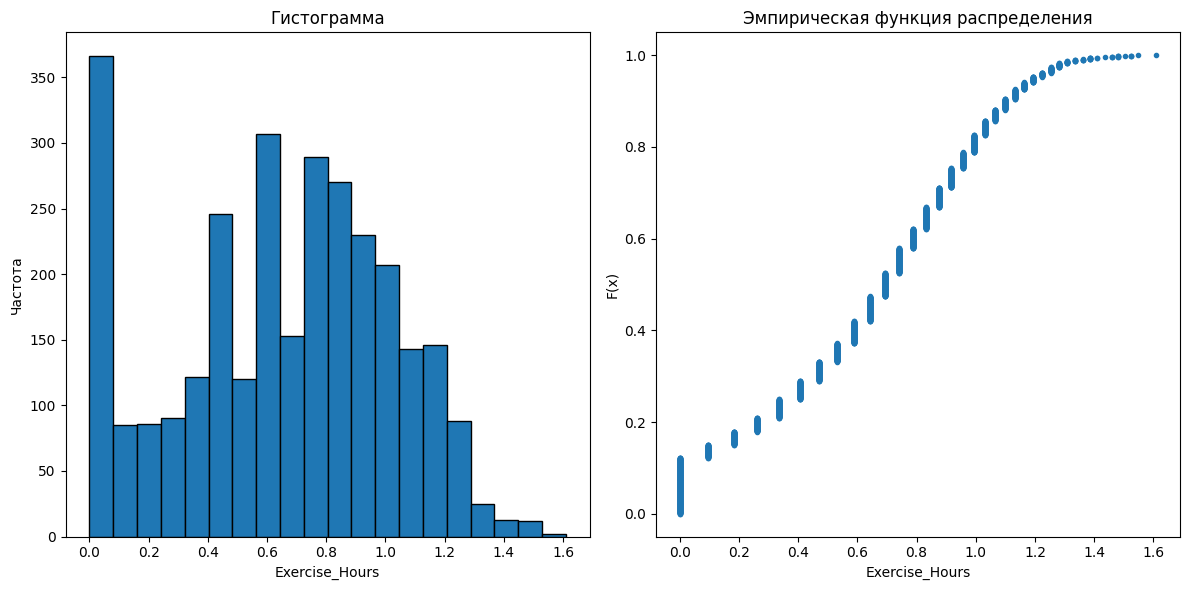

Хи-квадрат статистика: 921.30, p-value: 0.0000
Z-статистика для асимметрии: -5.57
Z-статистика для эксцесса: -9.47


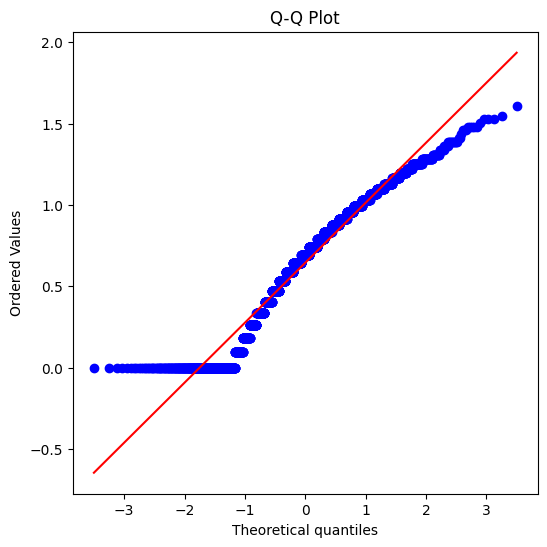

In [51]:
task1_2(data_log)

In [52]:
mean = data.mean()
var = data.var()
data_std = (data - mean) / np.sqrt(var)

Среднее:4.7369515717340015e-17
Дисперсия:1.0000000000000002
Мода:-1.416605979434427
Медиана:-0.055357440580076855
Квантили:
0.25   -0.735982
0.50   -0.055357
0.75    0.625267
Name: Exercise_Hours, dtype: float64
Эксцесс:-0.2590583883822499
Ассиметрия:0.4384191527891888
Интерквартильный размах:1.36124853885435


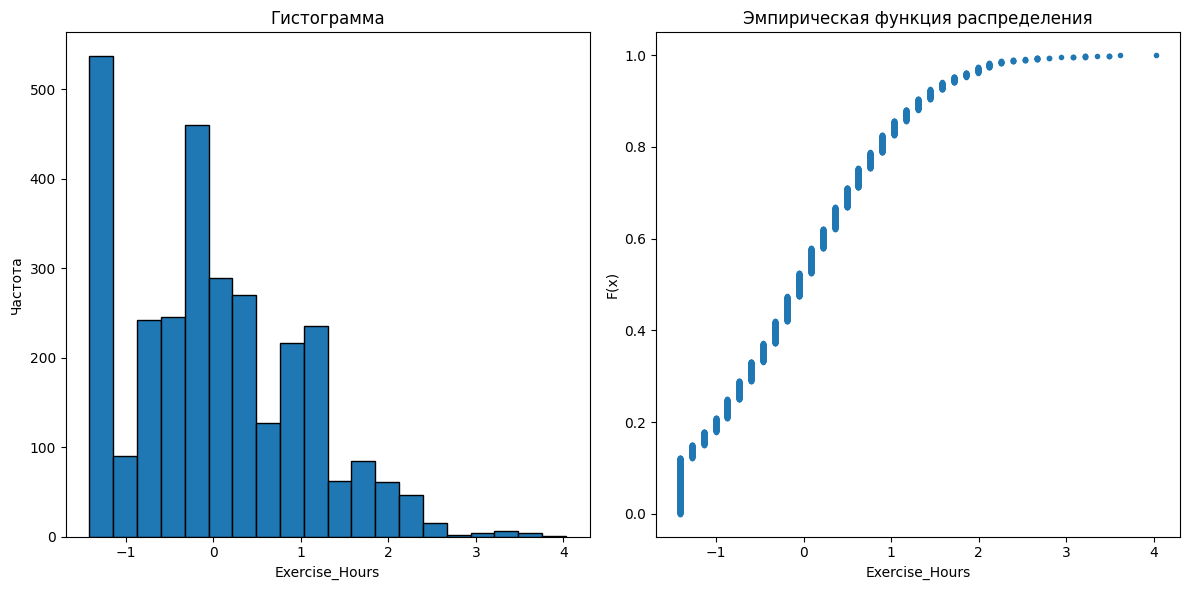

Хи-квадрат статистика: 2294.95, p-value: 0.0000
Z-статистика для асимметрии: 9.80
Z-статистика для эксцесса: -2.90


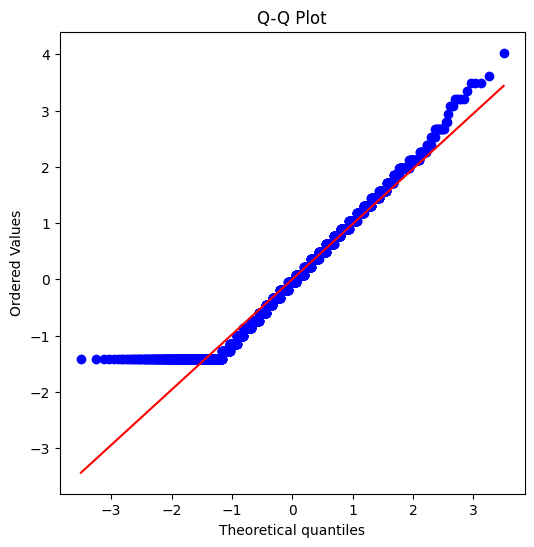

In [53]:
task1_2(data_std)

Среднее:0.6405130385552226
Дисперсия:0.1383167952753979
Мода:0.0
Медиана:0.6931471805599453
Квантили:
0.25    0.336472
0.50    0.693147
0.75    0.916291
Name: Exercise_Hours, dtype: float64
Эксцесс:-0.9001992653919872
Ассиметрия:-0.2873797222437714
Интерквартильный размах:0.5798184952529422


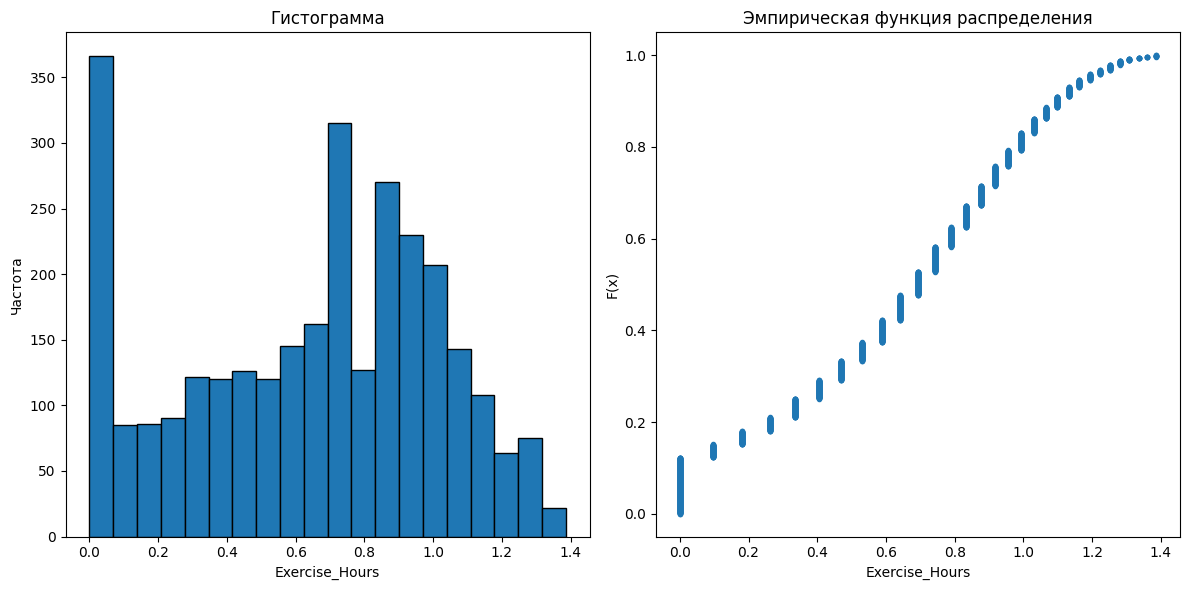

Хи-квадрат статистика: 552.80, p-value: 0.0000
Z-статистика для асимметрии: -6.41
Z-статистика для эксцесса: -10.04


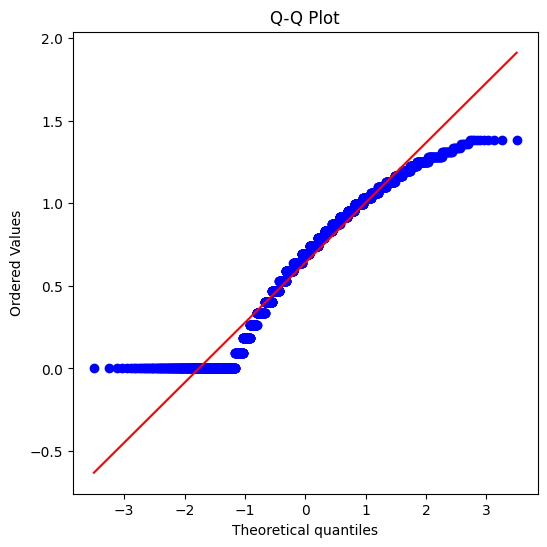

In [58]:
data_clened_log = np.log1p(data_cleaned)
task1_2(data_clened_log)

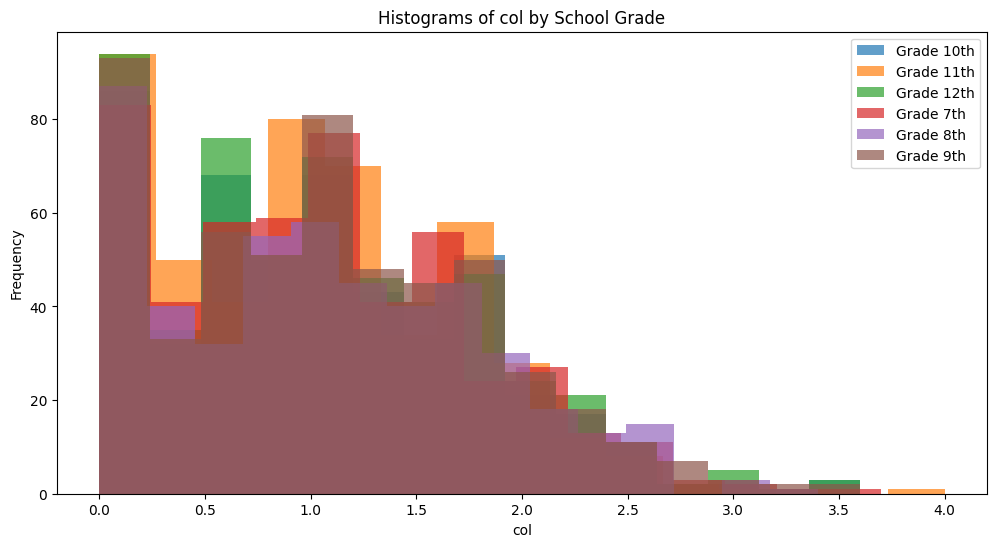

              mean   var
School_Grade            
10th          1.04  0.54
11th          0.98  0.49
12th          1.05  0.56
7th           1.03  0.53
8th           1.06  0.55
9th           1.08  0.56


In [56]:
grouped = df.groupby('School_Grade')[col]

plt.figure(figsize=(12, 6))
for grade, group_data in grouped:
    plt.hist(group_data, alpha=0.7, label=f'Grade {grade}', bins=15)
plt.xlabel('col')
plt.ylabel('Frequency')
plt.title('Histograms of col by School Grade')
plt.legend()
plt.show()

stats = grouped.agg(['mean', 'var']).round(2)
print(stats)